In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Интегрирование

In [2]:
x_0 = -2.0
x_1 = 2.0
h1 = 1.0
h2 = 0.5

I = 1.77777

In [3]:
f = lambda x: (3*x+4) / (2*x+7)
acc = lambda f1,f2: abs(f1 - f2)

## Проверка методом Рунге-Ромберга

In [4]:
def runge_romberg_richardson(h1, F1, h2, F2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1)**p - 1)
    else:
        return F2 + (F2 - F1) / ((h1 / h2)**p - 1)

## Метод прямоугольников

In [5]:
def rectangle_integration(a, b, h):
    integ, x = 0.0, a
    while x < b:
        integ += f(x + h / 2)
        x += h
    return h*integ

In [6]:
R1 = rectangle_integration(x_0, x_1, h1)
R2 = rectangle_integration(x_0, x_1, h2)
RRR_R = runge_romberg_richardson(h1, R1, h2, R2, 2)
R1,h1,R2,h2,acc(RRR_R, I)

(1.8291666666666666, 1.0, 1.7909819111057501, 0.5, 0.0004836592521111349)

## Метод трапеций

In [7]:
def trapeze_integration(a, b, h):
    integ, x = f(a) / 2, a + h
    while x < b:
        integ += f(x)
        x += h
    return h*(integ + f(x) / 2)

In [8]:
T1 = trapeze_integration(x_0, x_1, h1)
T2 = trapeze_integration(x_0, x_1, h2)
RRR_T = runge_romberg_richardson(h1, T1, h2, T2, 2)
T1,h1,T2,h2,acc(RRR_T, I)

(1.6704184704184706, 1.0, 1.7497925685425686, 0.5, 0.0015193987493988814)

## Метод Симпсона

In [9]:
def simpson_integration(a, b, h):
    integ, x = 0.0, a + h
    while x < b:
        integ += f(x - h) + 4*f(x) + f(x + h)
        x += h + h
    return h*integ/3

In [10]:
S1 = simpson_integration(x_0, x_1, h1)
S2 = simpson_integration(x_0, x_1, h2)
RRR_S = runge_romberg_richardson(h1, S1, h2, S2, 4)
S1,h1,S2,h2,acc(RRR_S, I)

(1.7654641654641656, 1.0, 1.7762506012506012, 0.5, 0.0008003030303032066)

## Зависимость ошибки от шага

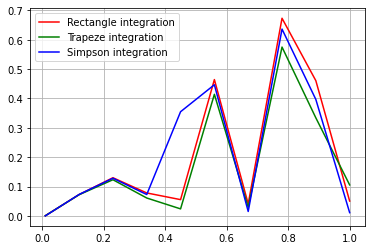

In [11]:
x = np.linspace(0.01,1,10)

y1 = list(map(lambda step: acc(RRR_R, rectangle_integration(x_0, x_1, step)), x))
y2 = list(map(lambda step: acc(RRR_T, trapeze_integration(x_0, x_1, step)), x))
y3 = list(map(lambda step: acc(RRR_S, simpson_integration(x_0, x_1, step)), x))

plt.plot(x, y1,'r', label = 'Rectangle integration')
plt.plot(x, y2,'g', label = 'Trapeze integration')
plt.plot(x, y3,'b', label = 'Simpson integration')
plt.legend()
plt.grid()

## Логарифмическая ошибка

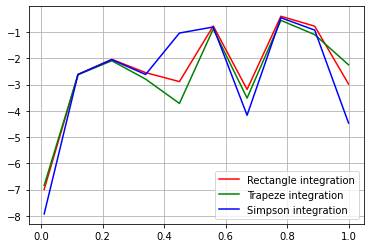

In [12]:
x = np.linspace(0.01,1,10)

y1 = list(map(lambda step: np.log(acc(RRR_R, rectangle_integration(x_0, x_1, step))), x))
y2 = list(map(lambda step: np.log(acc(RRR_T, trapeze_integration(x_0, x_1, step))), x))
y3 = list(map(lambda step: np.log(acc(RRR_S, simpson_integration(x_0, x_1, step))), x))

plt.plot(x, y1,'r', label = 'Rectangle integration')
plt.plot(x, y2,'g', label = 'Trapeze integration')
plt.plot(x, y3,'b', label = 'Simpson integration')

plt.legend()
plt.grid()